In [1]:
from ler import LeR  # calling the package
import bilby
import numpy as np

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
# ET
# from bilby
# gives three L shape config
ifosET = bilby.gw.detector.networks.TriangularInterferometer(
    name = 'ET',
    power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='ET_B_psd.txt'),
    length = 10,
    minimum_frequency = 10,
    maximum_frequency = 2048,
    latitude = 40. + 31. / 60 + 0. / 3600,
    longitude = 9. + 25. / 60 + 0. / 3600,
    elevation = 51.884,
    xarm_azimuth = 90.,
    yarm_azimuth = 90.+60.,
    xarm_tilt = 0.,
    yarm_tilt = 0.)

In [3]:
# initilize ler with gwsnr's input params 
my_psd = {'ET1':'ET_B_psd.txt', 'ET2':'ET_B_psd.txt', 'ET3':'ET_B_psd.txt'}
my_ifos = ifosET
my_psd_file = [True,True,True]

In [5]:
# initialization
# this also initializes the gwsnr (SNR calculator method)
ler = LeR(npool=int(6),z_min=0., z_max=20., 
           nsamples=1000000,
           batch_size=50000,
           mtot_min=2.,
           mtot_max=440.,  # highest total mass possible at 10Hz
           nsamples_mtot=200, 
           nsamples_mass_ratio=500,
           sampling_frequency=2048.,
           waveform_approximant = 'IMRPhenomD', 
           minimum_frequency = 10.,
           snr_type = 'interpolation', 
           waveform_inspiral_must_be_above_fmin=False,
           psds=my_psd,
           psd_file=my_psd_file,
           ifos=my_ifos)

Given: IMR waveform, {self.waveform_approximant}.
given psds:  {'ET1': 'ET_B_psd.txt', 'ET2': 'ET_B_psd.txt', 'ET3': 'ET_B_psd.txt'}
Interpolator will be loaded for ET1 detector from ./interpolator_pickle/ET1/halfSNR_dict_0.pickle
Interpolator will be loaded for ET2 detector from ./interpolator_pickle/ET2/halfSNR_dict_0.pickle
Interpolator will be loaded for ET3 detector from ./interpolator_pickle/ET3/halfSNR_dict_0.pickle


In [9]:
ler.unlensed_cbc_statistics(json_file="./unlensed_params_BBH_ET_1M.json",resume=True);  # unlensed param sampling

ler.unlensed_rate(gw_param="./unlensed_params_BBH_ET_1M.json",jsonfile="./unlensed_params_detectable_BBH_ET_1M.json");

ler.lensed_cbc_statistics(json_file="./lensed_params_BBH_ET_1M.json", resume=True)  # lensed param sampling

ler.lensed_rate(lensed_param="./lensed_params_BBH_ET_1M.json",jsonfile="./lensed_params_detectable_BBH_ET_1M.json");

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./unlensed_params_BBH_ET_1M.json
getting gw_params from json file ./unlensed_params_BBH_ET_1M.json...
total unlensed rate (yr^-1) (with step function): 90495.49656998462
storing detectable unlensed params in ./unlensed_params_detectable_BBH_ET_1M.json
chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./lensed_params_BBH_ET_1M.json
getting lensed_param from json file ./lensed_params_BBH_ET_1M.json...
total lensed rate (yr^-1) (with step function): 61.84616422475118
storing detectable lensed params in ./lensed_params_detectable_BBH_ET_1M.json...


In [5]:
from ler import LeR
ler = LeR()

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_0.pickle


In [1]:
import json
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# getting data from json
# all
with open("./unlensed_params_BBH_ET_1M.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BBH_ET_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./unlensed_params_detectable_BBH_ET_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BBH_ET_1M.json") as f:
    lensed_params_detectable = json.load(f)

## For redshift distributions 

In [2]:
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))

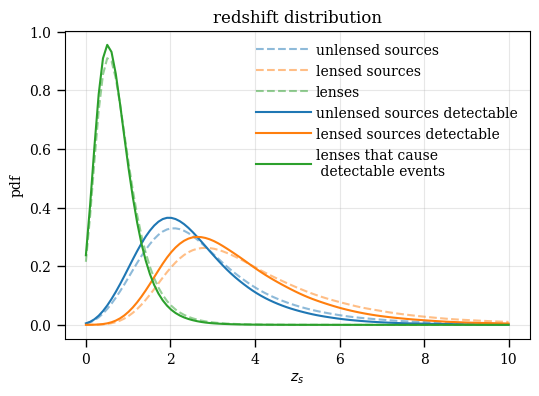

In [3]:
# plot
plt.figure(figsize=(6,4))
zs = np.linspace(0,10,100)
# all
plt.plot(zs, np.exp(kde_unlensed.score_samples(zs.reshape(-1,1))), label='unlensed sources', color='C0', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lensed.score_samples(zs.reshape(-1,1))), label='lensed sources', color='C1', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lenses.score_samples(zs.reshape(-1,1))), label='lenses', color='C2', linestyle='--', alpha=0.5)
# detectable
plt.plot(zs, np.exp(kde_unlensed_detectable.score_samples(zs.reshape(-1,1))), label='unlensed sources detectable', color='C0', linestyle='-')
plt.plot(zs, np.exp(kde_lensed_detectable.score_samples(zs.reshape(-1,1))), label='lensed sources detectable', color='C1', linestyle='-')
plt.plot(zs, np.exp(kde_lenses_detectable.score_samples(zs.reshape(-1,1))), label='lenses that cause \n detectable events', color='C2', linestyle='-')
plt.xlabel(r'$z_s$')
plt.ylabel('pdf')
leg = plt.legend(handlelength=4)
leg.get_lines()[0].set_linewidth(1.5)
leg.get_lines()[1].set_linewidth(1.5)
leg.get_lines()[2].set_linewidth(1.5)
leg.get_lines()[3].set_linewidth(1.5)
leg.get_lines()[4].set_linewidth(1.5)
leg.get_lines()[5].set_linewidth(1.5)
plt.grid(alpha=0.3)
plt.title('redshift distribution')
plt.savefig("redshift_distribution_conf1.png")

## $log_{10}\Delta t$ (days) vs $\Delta log_{10}\mu$

In [6]:
mu_rel0, dt_rel0, mu_rel90, dt_rel90 = \
    ler.relative_mu_dt_lensed(lensed_param=lensed_params_detectable, snr_threshold=[8.,8.])

dmu, dt = ler.relative_mu_dt_unlensed(param=unlensed_params_detectable, size=200)

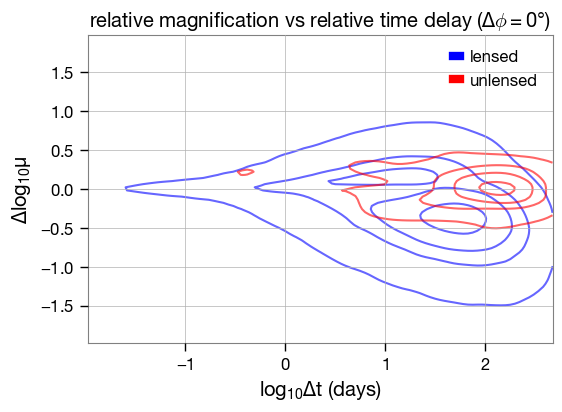

In [7]:
# plot
plt.figure(figsize=(6,4))
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
# labels
plt.xlabel(r"$log_{10}\Delta t$ (days)")
plt.ylabel(r"$\Delta log_{10}\mu$")
plt.title(r"relative magnification vs relative time delay ($\Delta \phi=0\degree$)")
# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])
#plt.savefig("mu_vs_dt_conf1.png")
plt.show()

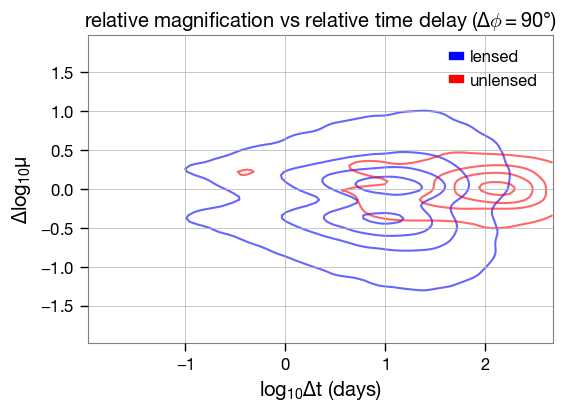

In [8]:
# plot
plt.figure(figsize=(6,4))
ler.mu_vs_dt_plot(x_array=dt_rel90, y_array=mu_rel90, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
# labels
plt.xlabel(r"$log_{10}\Delta t$ (days)")
plt.ylabel(r"$\Delta log_{10}\mu$")
plt.title(r"relative magnification vs relative time delay ($\Delta \phi=90\degree$)")
# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])
#plt.savefig("mu_vs_dt_conf1.png")
plt.show()

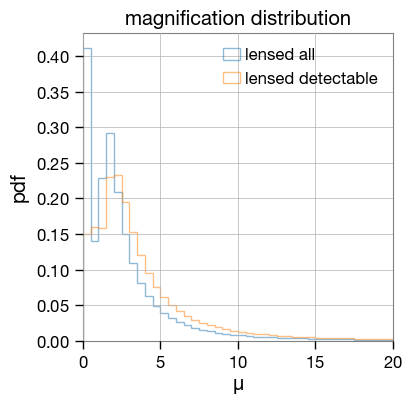

In [9]:
# plot for mu distribution
mu_all = np.array(lensed_params['magnifications']).flatten()
# select only non-nan values
mu_all = np.abs(mu_all[~np.isnan(mu_all)])
# select only values less than 20
mu_all = mu_all[mu_all<20]

# for detectable
mu_detectable = np.array(lensed_params_detectable['magnifications']).flatten()
# select only non-nan values
mu_detectable = np.abs(mu_detectable[~np.isnan(mu_detectable)])
# select only values less than 20
mu_detectable = mu_detectable[mu_detectable<20]

plt.hist(mu_all, bins=40, density=True, alpha=0.5, label='lensed all', histtype='step', linewidth=1)
plt.hist(mu_detectable, bins=40, density=True, alpha=0.5, label='lensed detectable', histtype='step', linewidth=1)
plt.xlim(0,20)
# label
plt.xlabel(r"$\mu$")
plt.ylabel("pdf")
# title
plt.title("magnification distribution")
plt.legend()
plt.show()